In [2]:
import pandas as pd
import numpy as np
import joblib


In [3]:
df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Tele-Com Customer Churn\Customer Churn Project\churn_view.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_3100\3293168196.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Tele-Com Customer Churn\Customer Churn Project\churn_view.csv")


In [3]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12505-GUJ,Male,29,No,Gujarat,0,7,NaN,Yes,No,...,Bank Withdrawal,95.650002,167.300003,0.0,0,33.520000,200.820007,Churned,Dissatisfaction,Limited range of services
1,12510-MAH,Male,44,Yes,Maharashtra,14,33,Deal 1,Yes,Yes,...,Bank Withdrawal,112.250000,8041.649902,0.0,0,839.520019,8881.169922,Stayed,Others,Others
2,12511-DEL,Male,50,Yes,Delhi,2,18,NaN,Yes,Yes,...,Bank Withdrawal,78.400002,1832.400024,0.0,130,758.880005,2721.280029,Stayed,Others,Others
3,12513-MAH,Female,18,No,Maharashtra,3,3,NaN,Yes,Yes,...,Bank Withdrawal,104.699997,6333.799805,0.0,150,2128.199951,8612.000000,Stayed,Others,Others
4,12516-TAM,Female,25,Yes,Tamil Nadu,3,30,Deal 3,Yes,No,...,Bank Withdrawal,101.400002,3143.649902,0.0,0,600.780029,3744.429932,Stayed,Others,Others


In [4]:
df=df.drop(['Customer_ID' ,'Churn_Category','Churn_Reason'  ],axis=1)

In [5]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [5]:
encoded_cols = ['Gender',  'Married', 'State',
        'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method']

In [6]:
df_encoded = pd.get_dummies(
        df, 
        columns=encoded_cols, 
        drop_first=True
    )

In [8]:
df_encoded.head()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,...,Premium_Support_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Streaming_Music_Yes,Unlimited_Data_Yes,Contract_One Year,Contract_Two Year,Paperless_Billing_Yes,Payment_Method_Credit Card,Payment_Method_Mailed Check
0,29,0,7,95.650002,167.300003,0.0,0,33.520000,200.820007,Churned,...,False,True,True,True,True,False,False,False,False,False
1,44,14,33,112.250000,8041.649902,0.0,0,839.520019,8881.169922,Stayed,...,True,True,True,True,True,False,True,True,False,False
2,50,2,18,78.400002,1832.400024,0.0,130,758.880005,2721.280029,Stayed,...,False,True,True,True,False,True,False,False,False,False
3,18,3,3,104.699997,6333.799805,0.0,150,2128.199951,8612.000000,Stayed,...,False,True,True,True,False,False,True,False,False,False
4,25,3,30,101.400002,3143.649902,0.0,0,600.780029,3744.429932,Stayed,...,False,True,True,True,True,False,False,True,False,False


In [7]:
df_encoded['Customer_Status'] = df_encoded['Customer_Status'].map({'Stayed':0,'Churned':1})

In [8]:
df_encoded.head()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,...,Premium_Support_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Streaming_Music_Yes,Unlimited_Data_Yes,Contract_One Year,Contract_Two Year,Paperless_Billing_Yes,Payment_Method_Credit Card,Payment_Method_Mailed Check
0,29,0,7,95.650002,167.300003,0.0,0,33.520000,200.820007,1,...,False,True,True,True,True,False,False,False,False,False
1,44,14,33,112.250000,8041.649902,0.0,0,839.520019,8881.169922,0,...,True,True,True,True,True,False,True,True,False,False
2,50,2,18,78.400002,1832.400024,0.0,130,758.880005,2721.280029,0,...,False,True,True,True,False,True,False,False,False,False
3,18,3,3,104.699997,6333.799805,0.0,150,2128.199951,8612.000000,0,...,False,True,True,True,False,False,True,False,False,False
4,25,3,30,101.400002,3143.649902,0.0,0,600.780029,3744.429932,0,...,False,True,True,True,True,False,False,True,False,False


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
X= df_encoded.drop('Customer_Status',axis=1)
y= df_encoded['Customer_Status']

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [18]:
print(model.score(X_test, y_test))

0.846089850249584


Class distribution:
 Customer_Status
0    0.71167
1    0.28833
Name: proportion, dtype: float64

Best parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       855
           1       0.72      0.69      0.71       347

    accuracy                           0.83      1202
   macro avg       0.80      0.79      0.80      1202
weighted avg       0.83      0.83      0.83      1202



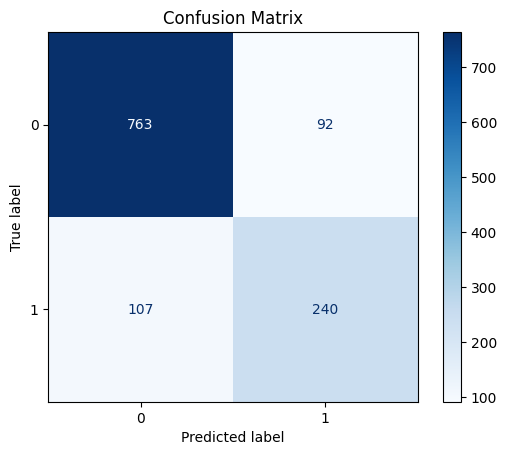

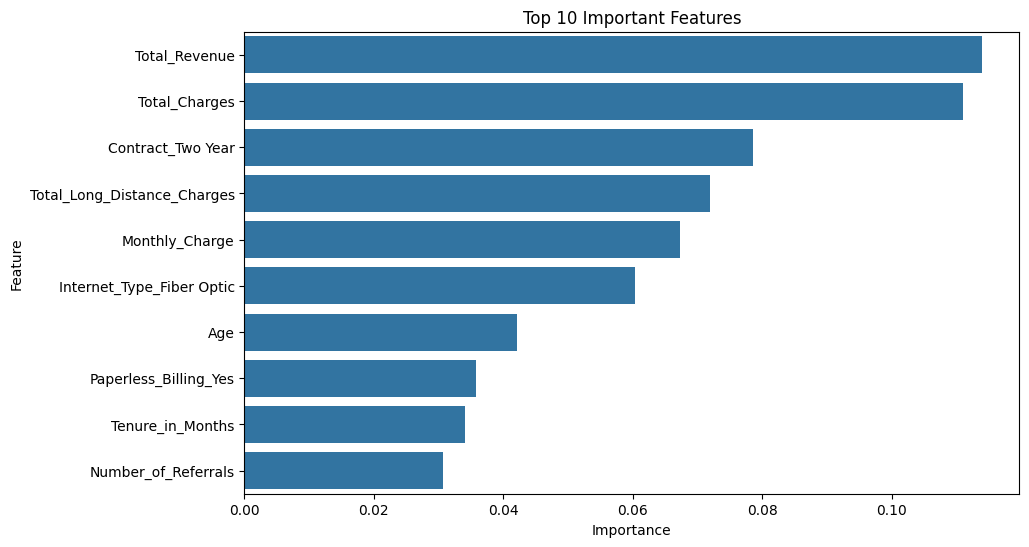

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Handle Class Imbalance 
print("Class distribution:\n", y.value_counts(normalize=True))

# Apply SMOTE oversampling 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#  Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_res, y_train_res)

best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Evaluate on Test Set
# Predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]  # For ROC curve

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#  Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()